<a href="https://colab.research.google.com/github/GuilhermeFernandez/AluraStore/blob/main/AluraStoreBrasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

lojas = [loja1, loja2, loja3, loja4]

loja1.head()


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [42]:
def faturamento (lista):
  faturamento = {index: loja['Preço'].sum() for index, loja in enumerate(lojas)}
  faturamento = pd.Series(faturamento)
  faturamento = faturamento.to_frame(name='Faturamento').reset_index()
  return(faturamento).sort_values('Faturamento', ascending=False)

faturamentos = faturamento(lojas)

print(faturamentos)

   index  Faturamento
0      0   1534509.12
1      1   1488459.06
2      2   1464025.03
3      3   1384497.58


# 2. Vendas por Categoria

In [43]:
def vendas_categoria (lista):
  df_vendas_categoria = []
  for l, r in zip(lista, range(1,5)):
    vendas_categoria = l['Categoria do Produto'].value_counts().head(5)
    vendas_categoria = pd.Series(vendas_categoria)
    vendas_categoria = vendas_categoria.to_frame(name='Vendas por Categoria').reset_index()
    vendas_categoria['Loja'] = r
    df_vendas_categoria.append(vendas_categoria)

  df_vendas_categoria = pd.concat(df_vendas_categoria).sort_values('Vendas por Categoria', ascending=False)
  return df_vendas_categoria

vendas_categorias = vendas_categoria(lojas)

display(vendas_categorias)

,Categoria do Produto,Vendas por Categoria,Loja
0,moveis,499,3
0,moveis,480,4
0,moveis,465,1
1,eletronicos,451,4
1,eletronicos,451,3
1,eletronicos,448,1
0,moveis,442,2
1,eletronicos,422,2
2,brinquedos,338,4
2,brinquedos,324,1


# 3. Média de Avaliação das Lojas


In [44]:
def avaliacoes (lista):
  avaliacao_lojas = {index: loja['Avaliação da compra'].mean() for index, loja in enumerate(lojas)}
  avaliacao_lojas = pd.Series(avaliacao_lojas)
  avaliacao_lojas = avaliacao_lojas.to_frame(name='Média de Avaliações').reset_index().sort_values('Média de Avaliações', ascending=False)
  return avaliacao_lojas

avaliacoes_lojas = avaliacoes(lojas)
print(avaliacoes_lojas)

   index  Média de Avaliações
2      2             4.048326
1      1             4.037304
3      3             3.995759
0      0             3.976685


# 4. Produtos Mais e Menos Vendidos

In [53]:
def maior_venda (lista):
  df_mais_vendidos = []
  for l, r in zip(lista, range(1,5)):
    mais_vendidos = l['Produto'].value_counts().head(5)
    mais_vendidos = pd.Series(mais_vendidos)
    mais_vendidos = mais_vendidos.to_frame(name='5 Produtos mais vendidos')
    mais_vendidos['Loja'] = r
    df_mais_vendidos.append(mais_vendidos)

  df_mais_vendidos = pd.concat(df_mais_vendidos).sort_values('5 Produtos mais vendidos', ascending=False)
  return df_mais_vendidos

maiores_vendas = maior_venda(lojas)
print(maiores_vendas)

                          5 Produtos mais vendidos  Loja
Produto                                                 
Iniciando em programação                        65     2
Micro-ondas                                     62     2
Cama box                                        62     4
Bateria                                         61     2
TV Led UHD 4K                                   60     1
Guarda roupas                                   60     1
Micro-ondas                                     60     1
Faqueiro                                        59     4
Secadora de roupas                              58     1
Violão                                          58     2
Pandeiro                                        58     2
Kit banquetas                                   57     3
Mesa de jantar                                  56     3
Cômoda                                          56     1
Dashboards com Power BI                         56     4
Cama king                      

In [46]:
def menor_venda (lista):
  df_menos_vendidos = []
  for l, r in zip(lista, range(1,5)):
    menos_vendidos = l['Produto'].value_counts().tail(5)
    menos_vendidos = pd.Series(menos_vendidos)
    menos_vendidos = menos_vendidos.to_frame(name='5 Produtos mais vendidos')
    menos_vendidos['Loja'] = r
    df_menos_vendidos.append(menos_vendidos)

  df_menos_vendidos = pd.concat(df_menos_vendidos)
  return df_menos_vendidos

menores_vendas = menor_venda(lojas)
print(menores_vendas)

                             5 Produtos mais vendidos  Loja
Produto                                                    
Ciência de dados com python                        39     1
Pandeiro                                           36     1
Panela de pressão                                  35     1
Headset                                            33     1
Celular ABXY                                       33     1
Fone de ouvido                                     37     2
Poltrona                                           35     2
Mesa de jantar                                     34     2
Impressora                                         34     2
Jogo de tabuleiro                                  32     2
Guitarra                                           38     3
Jogo de copos                                      36     3
Mochila                                            36     3
Micro-ondas                                        36     3
Blocos de montar                        

# 5. Frete Médio por Loja

In [47]:
def frete (lista):
  frete_medio = {index: loja['Frete'].mean() for index, loja in enumerate(lojas)}
  frete_medio = pd.Series(frete_medio)
  frete_medio = frete_medio.to_frame(name='Frete Médio').reset_index()
  return frete_medio

fretes = frete(lojas)
print(fretes)

   index  Frete Médio
0      0    34.691805
1      1    33.621941
2      2    33.074464
3      3    31.278997


# Nota das Lojas

In [59]:
def nota (lista):
  notas_lojas = []
  for index, loja in enumerate(lista):
    avaliacao = 0
    if faturamentos['index'].iloc[0] == index:
      avaliacao += 1
    if vendas_categorias['Loja'].iloc[0] == index+1:
      avaliacao += 1
    if avaliacoes_lojas['index'].iloc[0] == index:
      avaliacao += 1
    if maiores_vendas['Loja'].iloc[0] == index+1:
      avaliacao += 1
    if fretes['index'].iloc[0] == index:
      avaliacao += 1
    notas_lojas.append(avaliacao)

  notas_lojas = pd.Series(notas_lojas)
  notas_lojas = notas_lojas.to_frame(name='Desempenho').reset_index()
  return notas_lojas

notas_lojas = nota(lojas)
print(notas_lojas)

   index  Desempenho
0      0           2
1      1           1
2      2           2
3      3           0


# 6. Visualização

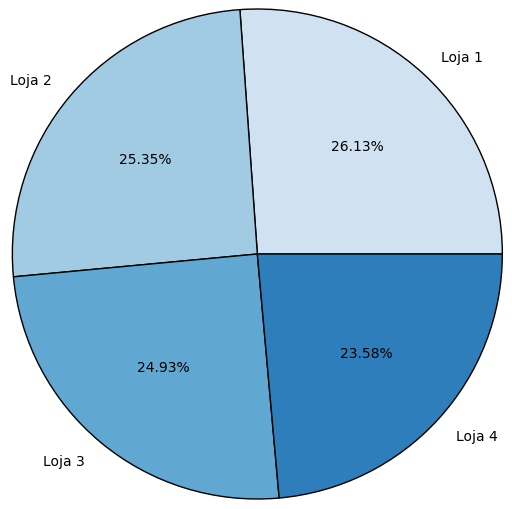

In [49]:
lojas_numero = []
for r in range(1,5):
  loja_numero = f'Loja {r}'
  lojas_numero.append(loja_numero)

plt.style.use('_mpl-gallery-nogrid')
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(lojas_numero)))

# plot
fig, ax = plt.subplots()
ax.pie(faturamentos['Faturamento'], labels=lojas_numero, normalize=True, colors=colors, radius=10, center=(4, 4), autopct='%.2f%%',
       wedgeprops={"linewidth": 1, "edgecolor": "black"})
ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

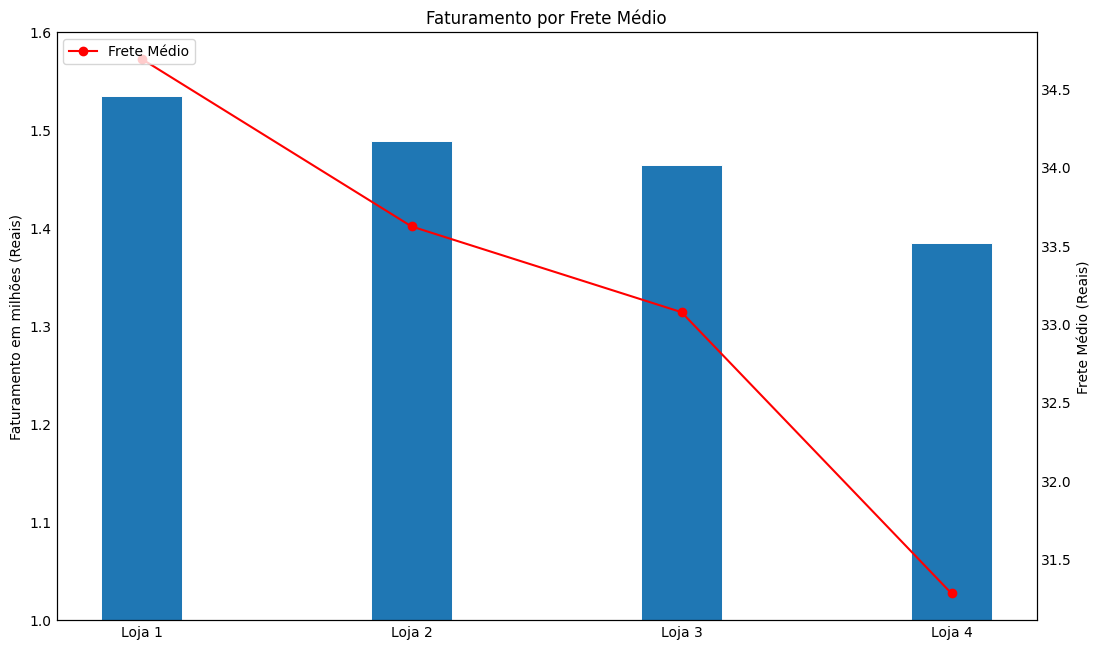

In [70]:
#Ideia era ver se a loja com menor frete era a com maior faturamento. Ou seja, se o cliente comprava na que tinha menor frete.

plt.style.use('_mpl-gallery')

x = lojas_numero
y = faturamentos['Faturamento'] / 1000000

fig, ax = plt.subplots(figsize= (10, 6))

ax.bar(x, y, width=0.3, edgecolor="white", linewidth=0.7)
ax.grid(visible = False)
ax.set(title='Faturamento por Frete Médio', ylabel='Faturamento em milhões (Reais)', ylim=(1,1.6))

ax2 = ax.twinx()

ax2.plot(lojas_numero, fretes['Frete Médio'], color='red', marker='o', label='Frete Médio')
ax2.set_ylabel('Frete Médio (Reais)')
ax2.grid(visible = False)

handles, labels = ax2.get_legend_handles_labels()
plt.legend(handles, labels, loc='upper left')

plt.show()

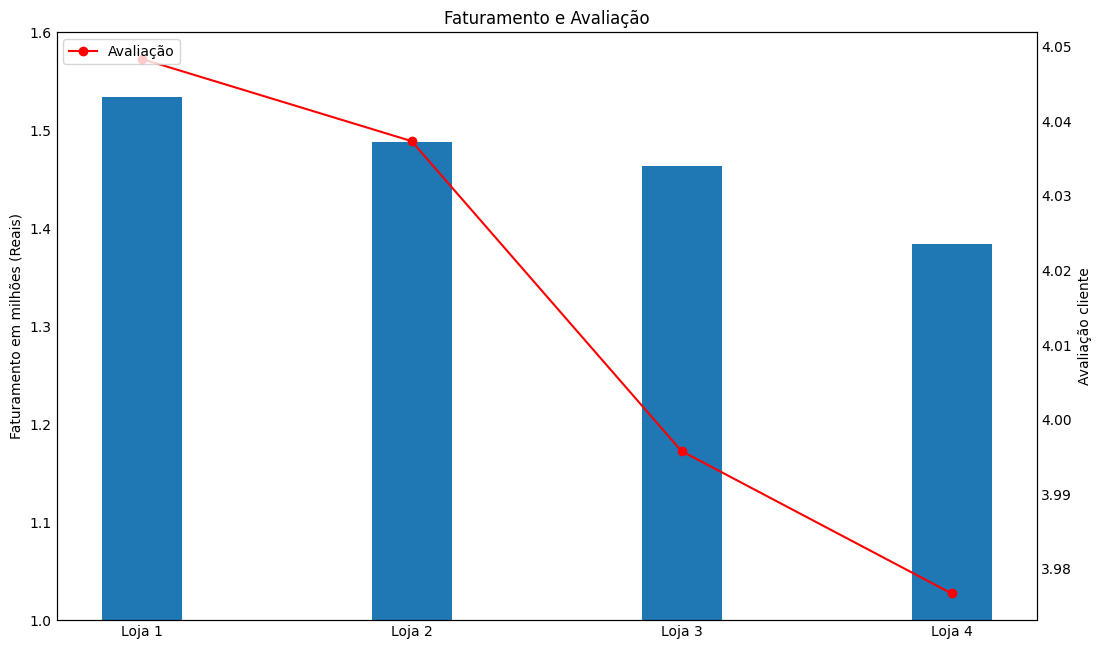

In [71]:
plt.style.use('_mpl-gallery')

x = lojas_numero
y = faturamentos['Faturamento'] / 1000000

fig, ax = plt.subplots(figsize= (10, 6))

ax.bar(x, y, width=0.3, edgecolor="white", linewidth=0.7)
ax.grid(visible = False)
ax.set(title='Faturamento e Avaliação', ylabel='Faturamento em milhões (Reais)', ylim=(1,1.6))

ax2 = ax.twinx()

ax2.plot(lojas_numero, avaliacoes_lojas['Média de Avaliações'], color='red', marker='o', label='Avaliação')
ax2.set(ylabel='Avaliação cliente')
ax2.grid(visible = False)

handles, labels = ax2.get_legend_handles_labels()
plt.legend(handles, labels, loc='upper left')

plt.show()

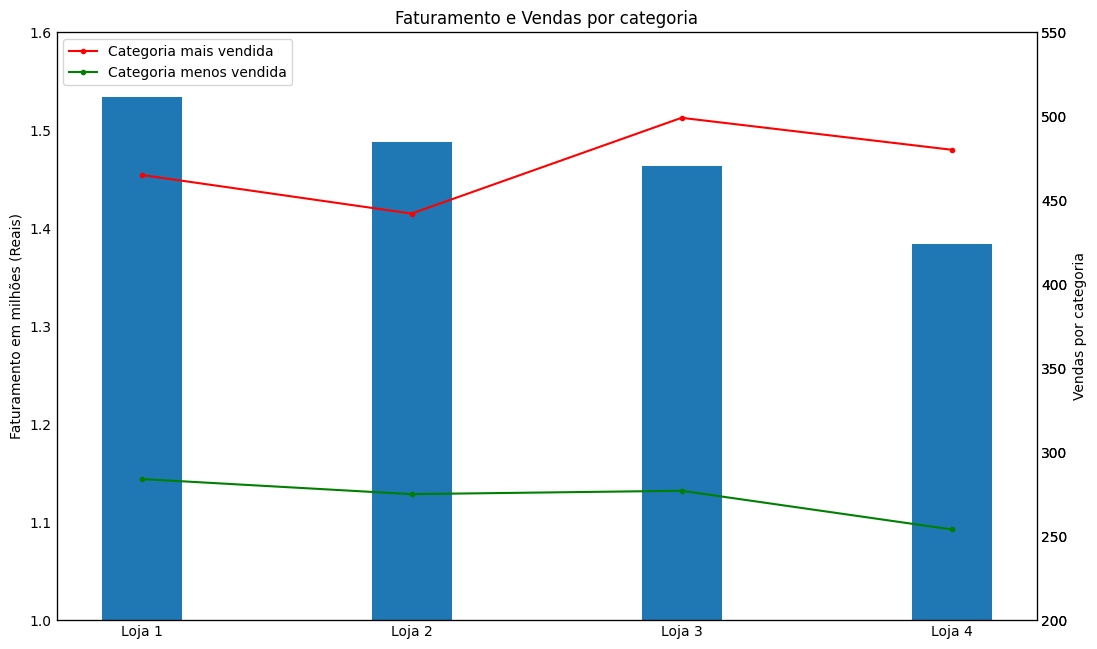

In [52]:
from matplotlib.lines import Line2D
from matplotlib import legend

plt.style.use('_mpl-gallery')

x = lojas_numero
y = faturamentos['Faturamento'] / 1000000

fig, ax = plt.subplots(figsize= (10, 6))

ax.bar(x, y, width=0.3, edgecolor="white", linewidth=0.7)
ax.grid(visible = False)
ax.set(title='Faturamento e Vendas por categoria', ylabel='Faturamento em milhões (Reais)', ylim=(1,1.6))

ax2 = ax.twinx()
ax2.plot(lojas_numero, vendas_categorias.groupby('Loja')['Vendas por Categoria'].first(), color='red', marker='.', label='Categoria mais vendida')
ax2.set(ylabel='Vendas por categoria', ylim=(200,550))
ax2.grid(visible = False)

ax3 = ax.twinx()
ax3.plot(lojas_numero, vendas_categorias.groupby('Loja')['Vendas por Categoria'].last(), color='green', marker='.', label='Categoria menos vendida')
ax3.set(ylim=(200,550))
ax3.grid(visible = False)

handles2, labels2 = ax2.get_legend_handles_labels()
handles3, labels3 = ax3.get_legend_handles_labels()
all_handles = handles2 + handles3
all_labels = labels2 + labels3

# Criar a legenda usando os handles e labels combinados e plotar
plt.legend(all_handles, all_labels, loc='upper left')
plt.show()

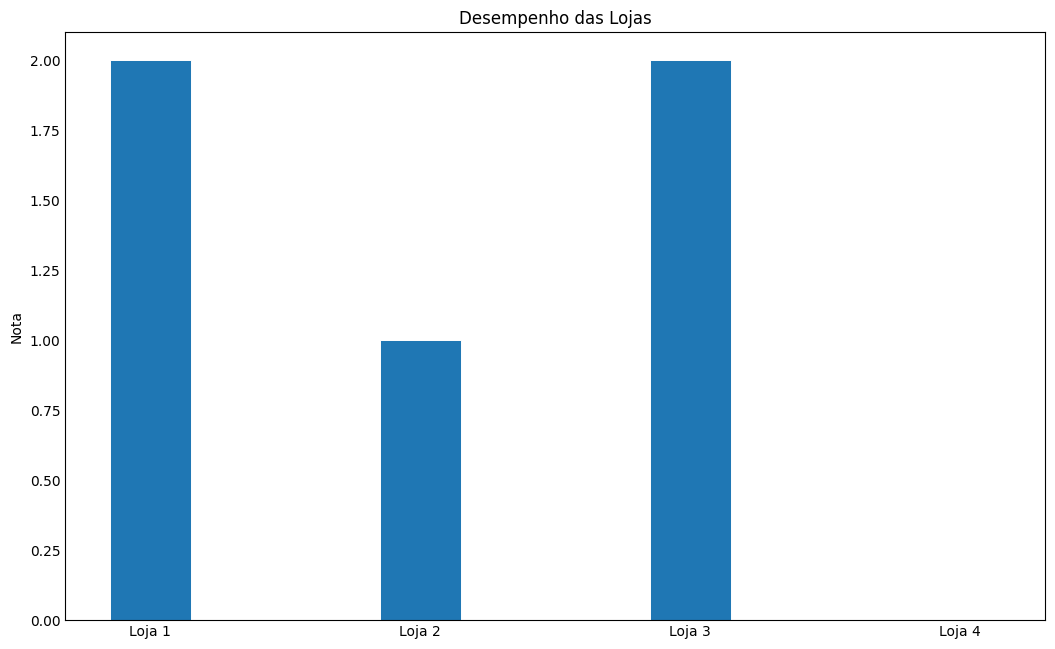

In [69]:
plt.style.use('_mpl-gallery')

x = lojas_numero
y = notas_lojas['Desempenho']

fig, ax = plt.subplots(figsize= (10, 6))

ax.bar(x, y, width=0.3, edgecolor="white", linewidth=0.7)
ax.grid(visible = False)
ax.set(title='Desempenho das Lojas', ylabel='Nota')

plt.show()

# Relatório

Essa análise foi desenvolvida com o objetivo de analisar o desemepenho de 4 lojas para tomada de decisão acerca da venda de uma delas. Para tanto, usou de diferentes informações e visualização de dados de forma comparativa para substanciar a resposta.

**A recomendação final é que a Loja 4 seja vendida**, por apresentar **pior desempenho**, como mostrado na Figura 5.

A Loja 4 não obteve melhor desempenho (primeiro lugar) em nenhuma das analises realizadas. Em contrapartida, a Loja 1 e 3 foram as com melhor desempenho em avaliações como Faturamento, Maiores vendas de produtos, Melhor Avaliação de clientes e Categorias mais vendidas.

A Loja 2 se destacou por oferecer o menor frete dentre todas, o que pode ter contribuído para sua segunda colocação entre as avaliações dos clientes.
Como observado no quarto gráfico, tambémm nos produtos menos vendidos a Loja 4 apresenta pior desempenho.

Podemos ver inclusive no terceiro gráfico isso refletido: pior faturamento entre as lojas e também pior avaliação dos clientes.

Assim, a recomendação final é que dentre as lojas analisadas, a Loja 4 é o ativo menos valioso e, em necessidade de venda, é a escolha mais favorável.